

<span style="font-size:20px; color:blue"> REGRESION LINEAL</span>

In [ ]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
# lectura de datos y lo cargamos en la variable Datos

Datos = pd.read_csv(r'C:\Users\carli\OneDrive\Escritorio\dataset_vehiculos.csv')


In [12]:
from IPython.display import display

# Mostrar el DataFrame completo
display(Datos)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner




<span style="font-size:20px; color:blue">1) ANALISIS EXPLORATORIO </span>

In [30]:
# Ver cuántos valores faltantes hay en cada columna
print(Datos.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


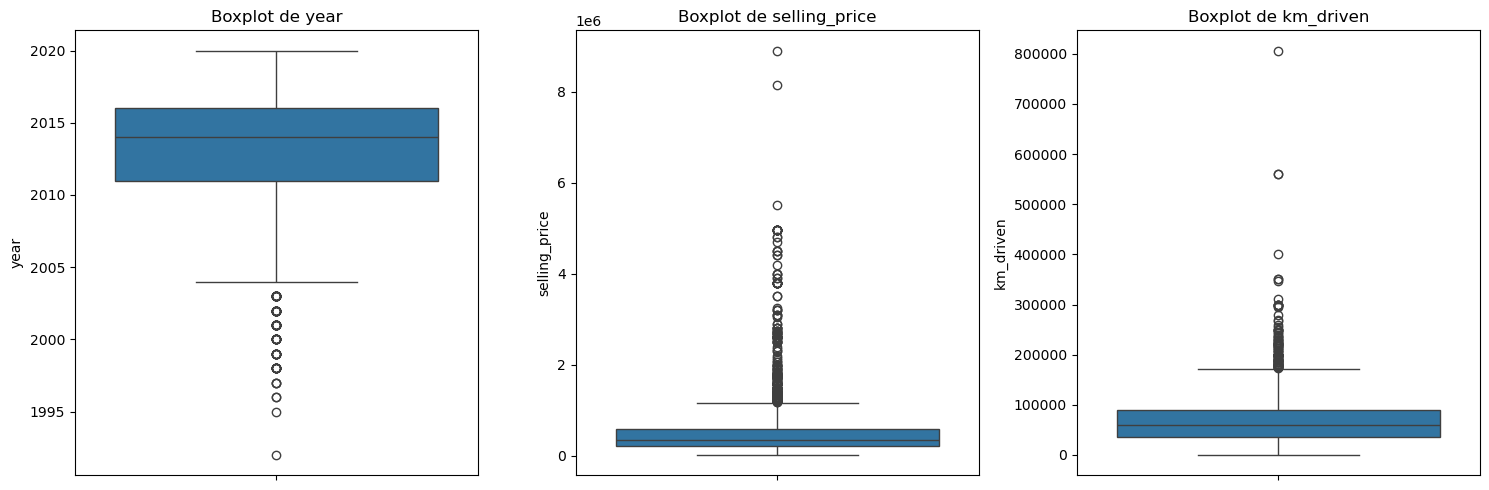

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tamaño de la figura
plt.figure(figsize=(15, 5))

# Graficar cada columna numérica
for i, column in enumerate(['year', 'selling_price', 'km_driven'], 1):
    plt.subplot(1, 3, i)  # Crear una subtrama
    sns.boxplot(y=Datos[column])
    plt.title(f'Boxplot de {column}')
    
plt.tight_layout()  # Ajuste para evitar solapamientos
plt.show()



<span style="font-size:20px; color:blue">2) LIMPIEZA DE LOS DATOS </span>

In [34]:
# Revisión de valores cero en columnas específicas del dataset de vehículos
print("Cantidad de Registros con cero en 'selling_price': ", Datos['selling_price'].isin([0]).sum())
print("Cantidad de Registros con cero en 'km_driven': ", Datos['km_driven'].isin([0]).sum())
print("Cantidad de Registros con cero en 'year': ", Datos['year'].isin([0]).sum())

# Reemplazar valores cero con el promedio de cada columna si es necesario
# (solo aplica si cero es un valor inválido para esa columna en tu análisis)
Datos['selling_price'] = Datos['selling_price'].replace(0, Datos['selling_price'].mean())
Datos['km_driven'] = Datos['km_driven'].replace(0, Datos['km_driven'].mean())
Datos['year'] = Datos['year'].replace(0, Datos['year'].mean())  # Si el año '0' es inválido

# Verificar los cambios
print("\nValores actualizados:")
print("Promedio de 'selling_price':", Datos['selling_price'].mean())
print("Promedio de 'km_driven':", Datos['km_driven'].mean())
print("Promedio de 'year':", Datos['year'].mean())

Cantidad de Registros con cero en 'selling_price':  0
Cantidad de Registros con cero en 'km_driven':  0
Cantidad de Registros con cero en 'year':  0

Valores actualizados:
Promedio de 'selling_price': 504127.3117511521
Promedio de 'km_driven': 66215.77741935484
Promedio de 'year': 2013.0907834101383


In [36]:
# Determinar el umbral del percentil 95 en la columna 'selling_price'
percentil_95 = Datos['selling_price'].quantile(0.95)

# Filtrar el DataFrame eliminando los valores mayores al percentil 95
Datos_filtrado = Datos[Datos['selling_price'] <= percentil_95]

# Verificar el cambio en el DataFrame
print(f"Cantidad de registros antes de eliminar valores costosos: {Datos.shape[0]}")
print(f"Cantidad de registros después de eliminar valores costosos: {Datos_filtrado.shape[0]}")

Cantidad de registros antes de eliminar valores costosos: 4340
Cantidad de registros después de eliminar valores costosos: 4136


In [38]:
# Definir el percentil 95 de kilometraje como umbral
umbral_km = Datos['km_driven'].quantile(0.95)

# Filtrar el DataFrame eliminando los registros con kilometraje por encima del umbral
Datos_filtrado = Datos[Datos['km_driven'] <= umbral_km]

# Verificar el cambio en el DataFrame
print(f"Cantidad de registros antes de eliminar alto kilometraje: {Datos.shape[0]}")
print(f"Cantidad de registros después de eliminar alto kilometraje: {Datos_filtrado.shape[0]}")


Cantidad de registros antes de eliminar alto kilometraje: 4340
Cantidad de registros después de eliminar alto kilometraje: 4132


Estadísticas después de eliminar valores atípicos en ambas columnas:
       selling_price      km_driven
count    2843.000000    2843.000000
mean   326178.497362   54467.221245
std    172357.970010   26820.081451
min     20000.000000       1.000000
25%    180000.000000   34400.000000
50%    300000.000000   55000.000000
75%    465000.000000   77036.500000
max    675000.000000  100000.000000


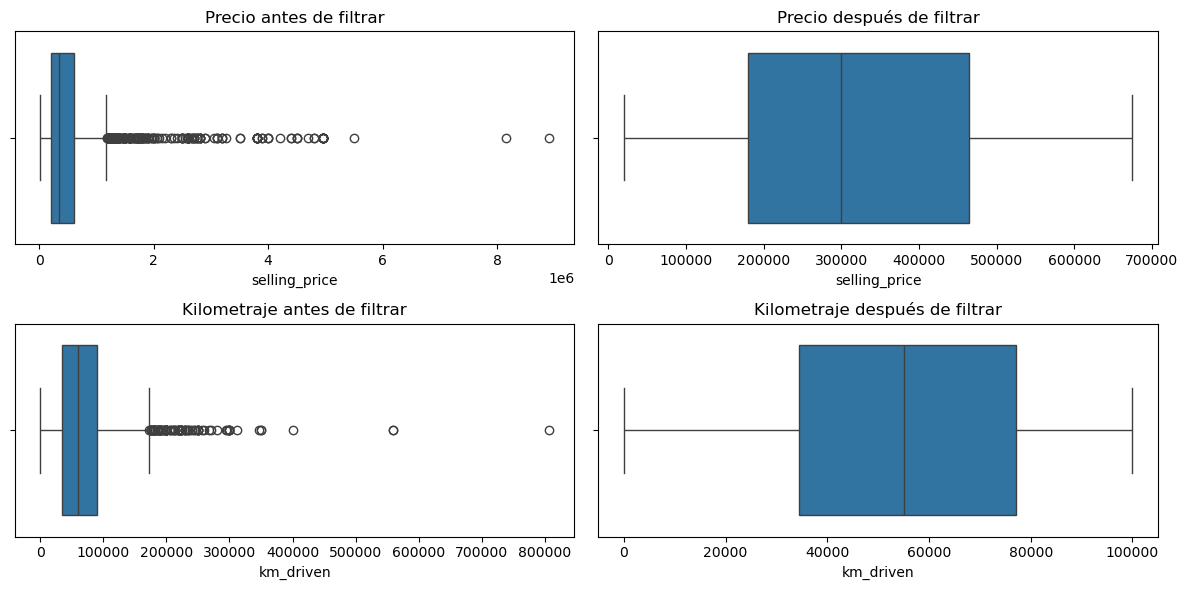

In [40]:
# Definir los umbrales usando el percentil 80 para ambos atributos
umbral_costo_80 = Datos['selling_price'].quantile(0.80)
umbral_km_80 = Datos['km_driven'].quantile(0.80)

# Filtrar los datos por debajo del percentil 80 tanto en 'selling_price' como en 'km_driven'
Datos_filtrados = Datos[(Datos['selling_price'] <= umbral_costo_80) & (Datos['km_driven'] <= umbral_km_80)]

# Estadísticas después de filtrar
print("Estadísticas después de eliminar valores atípicos en ambas columnas:")
print(Datos_filtrados[['selling_price', 'km_driven']].describe())

# Visualización con gráficos de caja para ambos atributos antes y después de filtrar
plt.figure(figsize=(12, 6))

# Gráficos de 'selling_price'
plt.subplot(2, 2, 1)
sns.boxplot(x=Datos['selling_price'])
plt.title("Precio antes de filtrar")

plt.subplot(2, 2, 2)
sns.boxplot(x=Datos_filtrados['selling_price'])
plt.title("Precio después de filtrar")

# Gráficos de 'km_driven'
plt.subplot(2, 2, 3)
sns.boxplot(x=Datos['km_driven'])
plt.title("Kilometraje antes de filtrar")

plt.subplot(2, 2, 4)
sns.boxplot(x=Datos_filtrados['km_driven'])
plt.title("Kilometraje después de filtrar")

plt.tight_layout()
plt.show()


<span style="font-size:20px; color:blue">3) SELECCION DE LAS CARACTERISTICAS </span>

In [50]:
# Importar LabelEncoder de scikit-learn
from sklearn.preprocessing import LabelEncoder

# Crear un diccionario para almacenar los codificadores de cada columna categórica
label_encoders = {}

# Listar las columnas que son categóricas
categorical_cols = ['fuel', 'seller_type', 'transmission']

# Iterar sobre cada columna categórica
for col in categorical_cols:
    # Crear un objeto LabelEncoder
    le = LabelEncoder()
    
    # Ajustar y transformar la columna categórica, reemplazando la columna original
    Datos[col] = le.fit_transform(Datos[col])
    
    # Almacenar el codificador para futuras referencias 
    label_encoders[col] = le

# Mostrar las primeras filas del dataframe para verificar la codificación
print(Datos.head())

                       name  year  selling_price  km_driven  fuel  \
0             Maruti 800 AC  2007          60000      70000     4   
1  Maruti Wagon R LXI Minor  2007         135000      50000     4   
2      Hyundai Verna 1.6 SX  2012         600000     100000     1   
3    Datsun RediGO T Option  2017         250000      46000     4   
4     Honda Amaze VX i-DTEC  2014         450000     141000     1   

   seller_type  transmission         owner  
0            1             1   First Owner  
1            1             1   First Owner  
2            1             1   First Owner  
3            1             1   First Owner  
4            1             1  Second Owner  


In [42]:
# Definir las características (X) y la variable objetivo (y)
X = Datos.drop('selling_price', axis=1)
y = Datos['selling_price']

# Mostrar la forma de X y Y para verificar que se han definido correctamente
print("Características (X):")
print(X.head())
print("\nVariable objetivo (y):")
print(y.head())

Características (X):
                       name  year  km_driven    fuel seller_type transmission  \
0             Maruti 800 AC  2007      70000  Petrol  Individual       Manual   
1  Maruti Wagon R LXI Minor  2007      50000  Petrol  Individual       Manual   
2      Hyundai Verna 1.6 SX  2012     100000  Diesel  Individual       Manual   
3    Datsun RediGO T Option  2017      46000  Petrol  Individual       Manual   
4     Honda Amaze VX i-DTEC  2014     141000  Diesel  Individual       Manual   

          owner  
0   First Owner  
1   First Owner  
2   First Owner  
3   First Owner  
4  Second Owner  

Variable objetivo (y):
0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64



<span style="font-size:20px; color:blue">4) DIVISION DEL DATASET EN TRAIN Y TEST</span>

In [44]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
# Utiliza un 80% para entrenamiento y un 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos para verificar la división
print("Conjunto de Entrenamiento X:", X_train.shape)
print("Conjunto de Prueba X:", X_test.shape)
print("Conjunto de Entrenamiento y:", y_train.shape)
print("Conjunto de Prueba y:", y_test.shape)

Conjunto de Entrenamiento X: (3472, 7)
Conjunto de Prueba X: (868, 7)
Conjunto de Entrenamiento y: (3472,)
Conjunto de Prueba y: (868,)


<span style="font-size:20px; color:blue">5) ENTRENAMIENTO DEL MODELO</span>

In [68]:
# Definir las características que deseas utilizar en el modelo
# Asegúrate de que estos nombres coincidan con las columnas de X
selected_features = ['year', 'km_driven', 'fuel', 'seller_type', 'transmission' ]  # Ajusta esta lista según lo que hayas decidido


from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Seleccionar las características relevantes para el conjunto de entrenamiento y prueba
# Asumiendo que 'selected_features' es una lista de los nombres de las columnas que decidiste usar
X_train_selected = X_train[selected_features]  # Conjunto de entrenamiento con las características seleccionadas
X_test_selected = X_test[selected_features]     # Conjunto de prueba con las características seleccionadas

# Entrenar el modelo
# Ajustar el modelo de regresión lineal a los datos de entrenamiento
model.fit(X_train_selected, y_train)

# Hacer predicciones
# Utilizar el modelo entrenado para predecir los precios de venta en el conjunto de prueba
y_pred = model.predict(X_test_selected)

# Evaluar el rendimiento del modelo
# Calcular el error cuadrático medio (MSE) para medir la precisión de las predicciones
print("MSE:", mean_squared_error(y_test, y_pred))

# Calcular el coeficiente de determinación (R^2) para entender qué tan bien se ajusta el modelo a los datos
print("R^2:", r2_score(y_test, y_pred))

MSE: 185680440881.24222
R^2: 0.3915513752548133


<span style="font-size:20px; color:blue">6) EVALUACION DE DESEMPEÑO</span>


<span style="font-size:20px; color:blue">7) EVALUACION Y GRAFICAS</span>

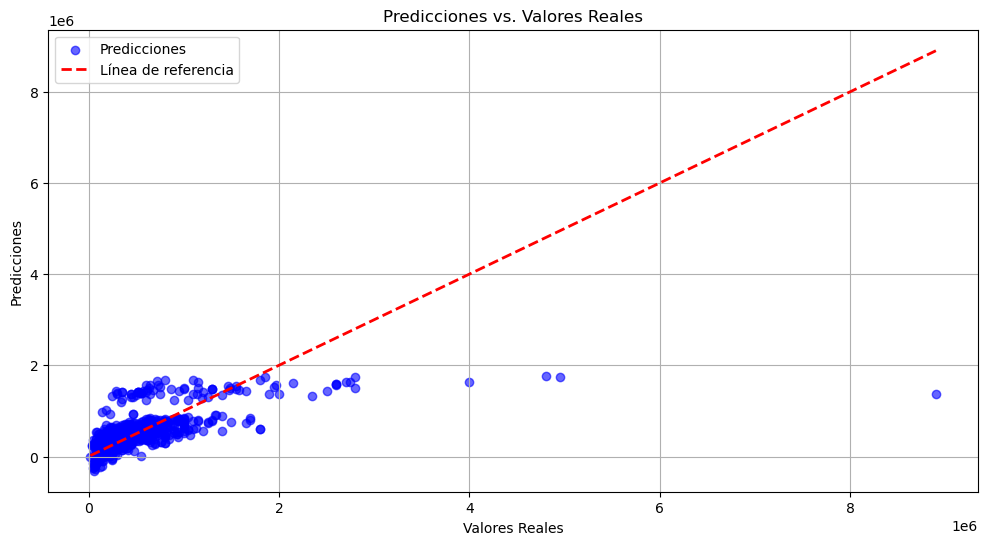

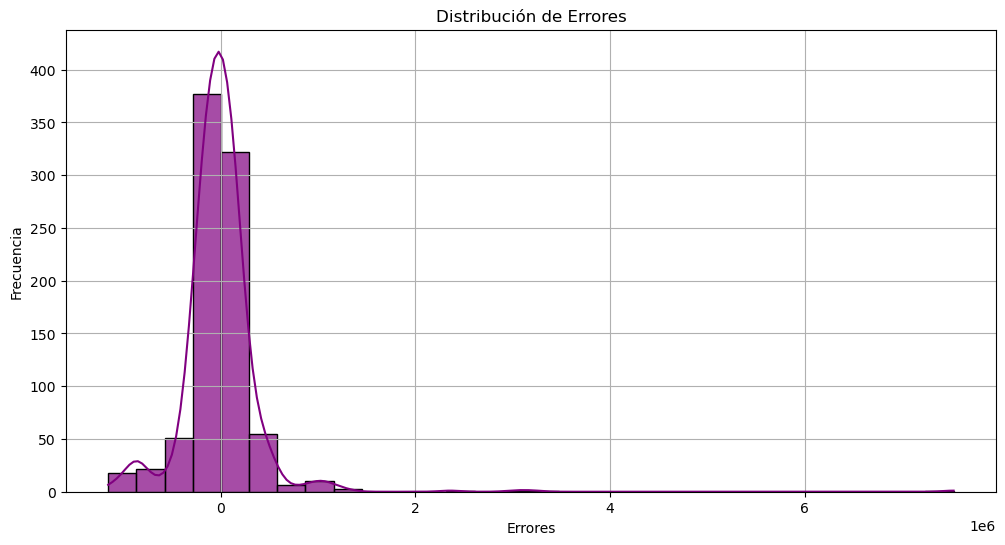

In [70]:
# 1. Gráfico de Dispersión de Predicciones vs. Valores Reales
plt.figure(figsize=(12, 6))  # Establecer el tamaño de la figura

# Crear un gráfico de dispersión
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicciones')  # Puntos de las predicciones
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Línea de referencia')  
# Línea de referencia que indica donde las predicciones son iguales a los valores reales

# Agregar título y etiquetas
plt.title('Predicciones vs. Valores Reales')  # Título del gráfico
plt.xlabel('Valores Reales')  # Etiqueta del eje X
plt.ylabel('Predicciones')  # Etiqueta del eje Y

plt.grid(True)  # Activar la cuadrícula para facilitar la lectura
plt.legend()  # Mostrar la leyenda para identificar los elementos
plt.show()  # Mostrar el gráfico

# 2. Histograma de Errores
errors = y_test - y_pred  # Calcular los errores (diferencia entre valores reales y predicciones)

plt.figure(figsize=(12, 6))  # Establecer el tamaño de la figura

# Crear un histograma de los errores
sns.histplot(errors, bins=30, kde=True, color='purple', alpha=0.7)  
# bins=30: número de barras en el histograma
# kde=True: incluir una curva de densidad que representa la distribución de los errores

# Agregar título y etiquetas
plt.title('Distribución de Errores')  # Título del gráfico
plt.xlabel('Errores')  # Etiqueta del eje X
plt.ylabel('Frecuencia')  # Etiqueta del eje Y

plt.grid(True)  # Activar la cuadrícula
plt.show()  # Mostrar el gráfico

<span style="font-size:20px; color:blue">INTERPRETACIÓN ANEXO EN EL DUCUMENTO PDF</span>
